In [1]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt


In [2]:
# Define the length of the training data
train_data_length = 1024

# create a tensor to store the training data
# It has 1024 rows and 2 columns (x and y values)
train_data = torch.zeros((train_data_length,2))
# Generate x values betweeen 0 and 2*pi
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

# calculate y values using the sin function
train_data[:, 1] = torch.sin(train_data[:, 0])

#  create a tensor to store the training lables (all zero in this case )
train_labels = torch.zeros(train_data_length)

# Create the training set by pairing data and labels
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]


In [3]:
train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [4]:
train_data

tensor([[ 6.1430, -0.1397],
        [ 0.2783,  0.2747],
        [ 2.0468,  0.8888],
        ...,
        [ 3.6175, -0.4581],
        [ 6.1803, -0.1027],
        [ 0.4637,  0.4473]])

In [5]:
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [6]:
train_set

[(tensor([ 6.1430, -0.1397]), tensor(0.)),
 (tensor([0.2783, 0.2747]), tensor(0.)),
 (tensor([2.0468, 0.8888]), tensor(0.)),
 (tensor([ 5.4101, -0.7663]), tensor(0.)),
 (tensor([0.0529, 0.0529]), tensor(0.)),
 (tensor([ 3.3396, -0.1968]), tensor(0.)),
 (tensor([2.3945, 0.6795]), tensor(0.)),
 (tensor([0.4141, 0.4024]), tensor(0.)),
 (tensor([2.2853, 0.7554]), tensor(0.)),
 (tensor([ 4.4796, -0.9730]), tensor(0.)),
 (tensor([ 3.5542, -0.4010]), tensor(0.)),
 (tensor([ 4.2773, -0.9068]), tensor(0.)),
 (tensor([ 4.5846, -0.9919]), tensor(0.)),
 (tensor([ 4.1963, -0.8697]), tensor(0.)),
 (tensor([2.5844, 0.5288]), tensor(0.)),
 (tensor([ 4.8363, -0.9923]), tensor(0.)),
 (tensor([0.7971, 0.7153]), tensor(0.)),
 (tensor([0.0095, 0.0095]), tensor(0.)),
 (tensor([ 5.3041, -0.8300]), tensor(0.)),
 (tensor([0.5246, 0.5008]), tensor(0.)),
 (tensor([2.7617, 0.3708]), tensor(0.)),
 (tensor([ 5.5062, -0.7012]), tensor(0.)),
 (tensor([0.1952, 0.1940]), tensor(0.)),
 (tensor([ 5.7210, -0.5331]), tenso

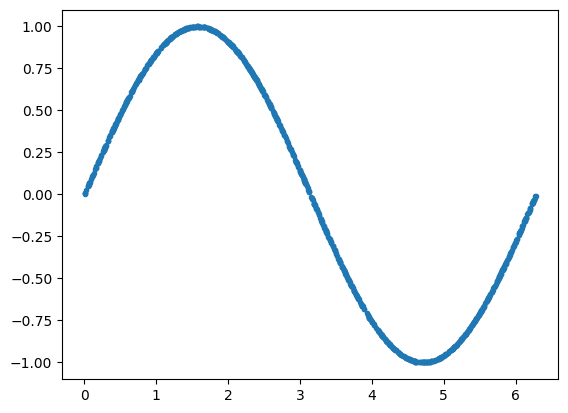

In [7]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [15]:
# set the batch for training

batch_size = 32
# create a data loader to iterate through the training data in batchses
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)


In [9]:
train_loader

In [10]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,556),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(556, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 1),
        nn.Sigmoid(),

    )

  def forward(self, x):
    output = self.model(x)
    return output


In [11]:
discriminator = Discriminator()


In [12]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2)

    )

  def forward(self, x):
   output = self.model(x)
   return output

generator = Generator()

In [13]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()


In [19]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)


In [20]:
for epoch in range(num_epochs):
  for n, (real_samples, _) in enumerate(train_loader):
    # Data for training the discriminator
    real_samples_labels = torch.ones((batch_size,1))
    latent_space_samples = torch.randn(batch_size, 2)
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))

    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)

    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_space_samples = torch.randn(batch_size, 2)

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)

    loss_generator.backward()
    optimizer_generator.step()

    # Show loss
    if epoch % 10 == 0 and n == batch_size - 1:
      print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
      print(f"Epoch: {epoch} Loss G.: {loss_generator}")



Epoch: 0 Loss D.: 0.16901618242263794
Epoch: 0 Loss G.: 3.351226568222046
Epoch: 10 Loss D.: 0.5379922986030579
Epoch: 10 Loss G.: 1.5194724798202515
Epoch: 20 Loss D.: 0.5617943406105042
Epoch: 20 Loss G.: 1.0368934869766235
Epoch: 30 Loss D.: 0.6573611497879028
Epoch: 30 Loss G.: 0.7606744766235352
Epoch: 40 Loss D.: 0.6719707250595093
Epoch: 40 Loss G.: 0.7917702198028564
Epoch: 50 Loss D.: 0.6264687776565552
Epoch: 50 Loss G.: 0.7165398001670837
Epoch: 60 Loss D.: 0.629098117351532
Epoch: 60 Loss G.: 0.7207531332969666
Epoch: 70 Loss D.: 0.6569827795028687
Epoch: 70 Loss G.: 0.731663703918457
Epoch: 80 Loss D.: 0.6681351661682129
Epoch: 80 Loss G.: 0.8191054463386536
Epoch: 90 Loss D.: 0.6976210474967957
Epoch: 90 Loss G.: 0.6829684972763062
Epoch: 100 Loss D.: 0.695512592792511
Epoch: 100 Loss G.: 0.6693460941314697
Epoch: 110 Loss D.: 0.6864498853683472
Epoch: 110 Loss G.: 0.6629617214202881
Epoch: 120 Loss D.: 0.711394727230072
Epoch: 120 Loss G.: 0.6890270113945007
Epoch: 130 L

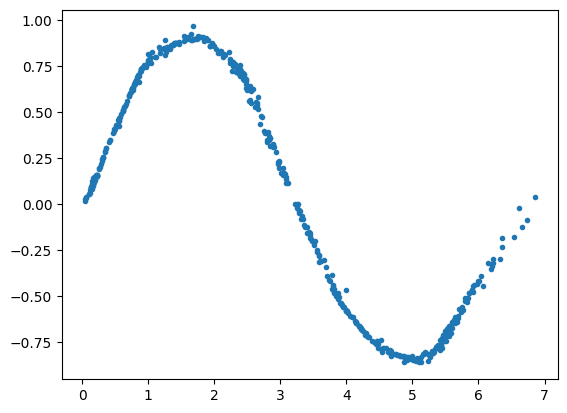

In [21]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

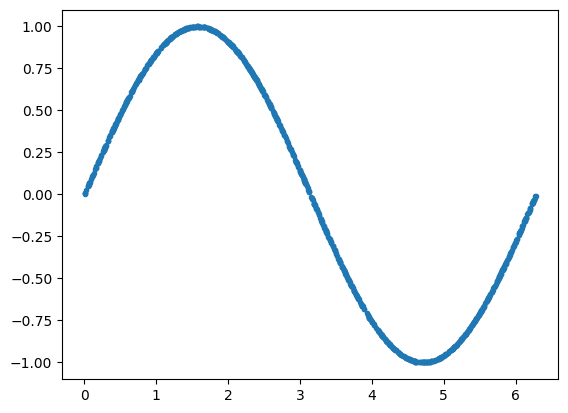

In [22]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")